In [1]:
import pandas
import numpy as np 
from sklearn.metrics import classification_report

In [2]:
moje_data = pandas.read_csv('ds2.csv',sep=';')
moje_data.head()

,ID,Min_EKG,Max_EKG,Mean_EKG,STDEV_EKG,Min_GSR,Max_GSR,Mean_GSR,STDEV_GSR,Min_Tep,Max_Tep,Mean_Tep,STDEV_Tep,Label
0,1_h,171,650,407.777358,137.906972,132,460,309.290566,95.519882,37.15,39.10,38.103925,0.564672,Neutral
1,2_h,170,650,420.826415,140.368050,130,460,291.343396,94.786518,35.68,37.63,36.632566,0.557221,Negative
2,3_h,174,649,411.766038,136.412941,131,456,294.433962,93.505167,37.16,38.61,37.878189,0.415849,Neutral
3,4_h,171,650,414.396226,145.213211,139,460,299.184906,97.555616,36.75,37.12,36.928604,0.112906,Neutral
4,5_h,170,650,415.049057,141.312521,131,458,277.800000,97.853950,36.75,37.12,36.948868,0.111699,Negative


In [5]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [6]:
X = moje_data.drop(['ID','Label'], axis=1)
y = moje_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [7]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [8]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)


In [9]:
clf = DecisionTreeClassifier(criterion = "gini", splitter = 'best', max_leaf_nodes = 3, min_samples_leaf = 10, max_depth= 10)
#clf = DecisionTreeClassifier()

In [10]:
%%time
clf = clf.fit(X_train_scaled,y_train,)

CPU times: user 2.03 ms, sys: 7 µs, total: 2.04 ms
Wall time: 2.29 ms


In [11]:
y_pred = clf.predict(X_test_scaled)

In [12]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6785714285714286


In [13]:
train_error = np.round(clf.score(X_train_scaled, y_train), 2)
test_error = np.round(clf.score(X_test_scaled, y_test), 2)
    
print("Presnosť tréningových dát = " + str(train_error))
print("Presnosť testovacích dát = " + str(test_error))

Presnosť tréningových dát = 0.69
Presnosť testovacích dát = 0.68


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


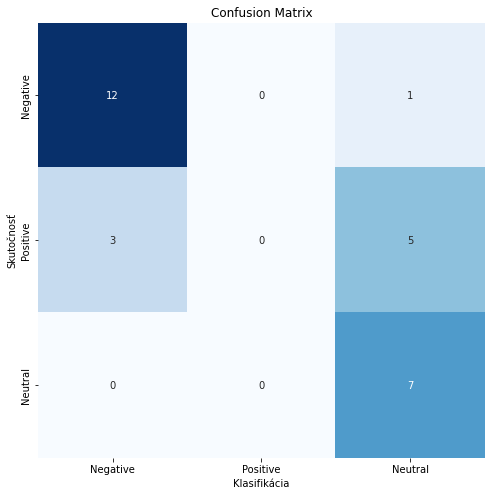

Classification Report:
----------------------
               precision    recall  f1-score   support

    Negative       0.80      0.92      0.86        13
    Positive       0.00      0.00      0.00         8
     Neutral       0.54      1.00      0.70         7

    accuracy                           0.68        28
   macro avg       0.45      0.64      0.52        28
weighted avg       0.51      0.68      0.57        28



In [14]:
from sklearn.metrics import confusion_matrix,  classification_report
import seaborn as sns
import matplotlib.pyplot as plt
mapovanie = {'Negative': 0, 'Positive': 1, 'Neutral': 2}
#y_pred = np.array(list(map(lambda x: np.argmax(x), clf.predict(X_test_scaled))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=mapovanie.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, mapovanie.keys())
plt.yticks(np.arange(3) + 0.5, mapovanie.keys())
plt.xlabel("Klasifikácia")
plt.ylabel("Skutočnosť")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)